In [2]:
import pandas as pd
import os

os.listdir('../data/final')

['carspeed.csv',
 'carspeed_14710.csv',
 'carspeed_25811.csv',
 'car_speed_36912.csv']

In [16]:
carspeed1 = pd.read_csv('../data/final/carspeed.csv')
carspeed2 = pd.read_csv('../data/final/car_speed_36912.csv')
print('shape 1 : ', carspeed1.shape)
print('shape 2 : ', carspeed2.shape)

shape 1 :  (7025495, 39)
shape 2 :  (4089876, 31)


In [4]:
#carspeed1 = pd.read_csv('../data/final/carspeed_14710.csv')
#carspeed2 = pd.read_csv('../data/final/carspeed_25811.csv')

In [7]:
print('shape 1 : ', carspeed1.shape)
print('shape 2 : ', carspeed2.shape)

shape 1 :  (4156794, 31)
shape 2 :  (2954589, 31)


# common link

In [17]:
common_link = set(carspeed1.link_id).intersection(set(carspeed2.link_id))
len(common_link)

4527

In [18]:
carspeed1 = carspeed1[carspeed1.link_id.isin(common_link)]
carspeed2 = carspeed2[carspeed2.link_id.isin(common_link)]

print('shape 1 : ', carspeed1.shape)
print('shape 2 : ', carspeed2.shape)

shape 1 :  (7025495, 39)
shape 2 :  (3997528, 31)


In [20]:
carspeed1.columns

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'special', 'vacation', 'time', 'value', 'temperature',
       'wind', 'rain', 'snow', 'cctv', 'kids', 'speed_limit', 'entrance',
       'signal', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'inter_num',
       '사망자수', '중상자수', '경상자수', '부상신고자수', 'victims', 'severity',
       'accident_count'],
      dtype='object')

In [22]:
del carspeed1, carspeed2

# intersection

In [22]:
os.listdir('../data')

['201801_Seoul_traffic.csv',
 '201804_Seoul_traffic.csv',
 '201807_Seoul_traffic.csv',
 '201810_Seoul_traffic.csv',
 'accident11.xlsx',
 'accident_new.csv',
 'dt_201903.csv',
 'dust1.csv',
 'dust_final.csv',
 'final',
 'gugucon.csv',
 'holiday.csv',
 'intersection.csv',
 'road_info.csv',
 'weather_merged.csv',
 '미세먼지1.xls',
 '미세먼지10.xls',
 '미세먼지4.xls',
 '미세먼지7.xls']

In [23]:
intersection = pd.read_csv('../data/intersection.csv')
intersection.head(3)

,도로명,상행,하행
0,4.19로,2.0,2.0
1,가락로,4.0,4.0
2,가로공원로,4.0,4.0


In [24]:
intersection = intersection.melt(id_vars = '도로명')
intersection.columns = ['road_name','direction','inter_num']
intersection.head()

,road_name,direction,inter_num
0,4.19로,상행,2.0
1,가락로,상행,4.0
2,가로공원로,상행,4.0
3,가로공원로76길,상행,1.0
4,가마산로,상행,10.0


In [25]:
carspeed2.head(3)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,NO2,PM10,PM2.5,cctv,kids,speed_limit,entrance,signal,special,vacation
8,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0.072,108.0,69.0,0.0,0.0,40.0,25.0,8.0,0,0
9,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0.070,111.0,66.0,0.0,0.0,40.0,25.0,8.0,0,0
10,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0.056,79.0,50.0,0.0,0.0,40.0,25.0,8.0,0,0


In [26]:
carspeed2 = pd.merge(carspeed2, intersection, how = 'left', left_on = ['road_name','direction'], right_on = ['road_name','direction'])
carspeed2.shape

(3997528, 32)

# accident_new

In [32]:
os.listdir('../data')

['201801_Seoul_traffic.csv',
 '201804_Seoul_traffic.csv',
 '201807_Seoul_traffic.csv',
 '201810_Seoul_traffic.csv',
 'accident11.xlsx',
 'accident_new.csv',
 'dt_201903.csv',
 'dust1.csv',
 'dust_final.csv',
 'final',
 'gugucon.csv',
 'holiday.csv',
 'intersection.csv',
 'road_info.csv',
 'weather_merged.csv',
 '미세먼지1.xls',
 '미세먼지10.xls',
 '미세먼지4.xls',
 '미세먼지7.xls']

In [27]:
accident_new = pd.read_csv('../data/accident_new.csv')
accident_new.columns = ['road_name','사망자수','중상자수','경상자수','부상신고자수','victims','severity','accident_count']
accident_new.head(3)

,road_name,사망자수,중상자수,경상자수,부상신고자수,victims,severity,accident_count
0,4.19로,0,3,15,1,19,55,13
1,63로,0,0,3,1,4,10,3
2,가락로,0,20,50,15,85,225,70


In [28]:
carspeed2 = pd.merge(carspeed2, accident_new, how = 'left', left_on = ['road_name'], right_on = ['road_name'])
carspeed2.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,special,vacation,inter_num,사망자수,중상자수,경상자수,부상신고자수,victims,severity,accident_count
0,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0,0,2.0,0.0,3.0,15.0,1.0,19.0,55.0,13.0
1,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0,0,2.0,0.0,3.0,15.0,1.0,19.0,55.0,13.0
2,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0,0,2.0,0.0,3.0,15.0,1.0,19.0,55.0,13.0
3,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0,0,2.0,0.0,3.0,15.0,1.0,19.0,55.0,13.0
4,20180313,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1.0,보조간선도로,...,0,0,2.0,0.0,3.0,15.0,1.0,19.0,55.0,13.0


In [29]:
carspeed2.isnull().sum()

date                  0
days                  0
road_name             0
link_id               0
start_point           0
end_point             0
direction             0
road_length           0
road_num              0
road_type             0
urban_suburb          0
district              0
time                  0
value                 0
temperature           0
wind                  0
rain                  0
snow                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
PM10                  0
PM2.5                 0
cctv                  0
kids                  0
speed_limit           0
entrance              0
signal                0
special               0
vacation              0
inter_num             0
사망자수              90065
중상자수              90065
경상자수              90065
부상신고자수            90065
victims           90065
severity          90065
accident_count    90065
dtype: int64

In [30]:
carspeed2 = carspeed2.fillna(0)
carspeed2.isnull().sum()

date              0
days              0
road_name         0
link_id           0
start_point       0
end_point         0
direction         0
road_length       0
road_num          0
road_type         0
urban_suburb      0
district          0
time              0
value             0
temperature       0
wind              0
rain              0
snow              0
SO2               0
CO                0
O3                0
NO2               0
PM10              0
PM2.5             0
cctv              0
kids              0
speed_limit       0
entrance          0
signal            0
special           0
vacation          0
inter_num         0
사망자수              0
중상자수              0
경상자수              0
부상신고자수            0
victims           0
severity          0
accident_count    0
dtype: int64

In [36]:
print(len(set(carspeed1) - set(carspeed2)))
print(len(set(carspeed2) - set(carspeed1)))

0
0


In [37]:
carspeed2 = carspeed2[carspeed1.columns]

In [39]:
carspeed1 = pd.concat([carspeed1, carspeed2], axis = 0)
carspeed1.isnull().sum()

date              0
days              0
road_name         0
link_id           0
start_point       0
end_point         0
direction         0
road_length       0
road_num          0
road_type         0
urban_suburb      0
district          0
special           0
vacation          0
time              0
value             0
temperature       0
wind              0
rain              0
snow              0
cctv              0
kids              0
speed_limit       0
entrance          0
signal            0
SO2               0
CO                0
O3                0
NO2               0
PM10              0
PM2.5             0
inter_num         0
사망자수              0
중상자수              0
경상자수              0
부상신고자수            0
victims           0
severity          0
accident_count    0
dtype: int64

In [40]:
carspeed1.shape

(11023023, 39)

In [41]:
del carspeed2

In [43]:
carspeed1.time.value_counts()

19    1382092
18    1381816
20    1377753
17    1377520
8     1376229
9     1376123
7     1375931
6     1375559
Name: time, dtype: int64

# moring, evening

In [45]:
morning = carspeed1[(carspeed1.time == 6)|(carspeed1.time == 7)|(carspeed1.time == 8)|(carspeed1.time == 9)]
evening = carspeed1[(carspeed1.time == 17)|(carspeed1.time == 18)|(carspeed1.time == 19)|(carspeed1.time == 20)]

In [49]:
print('morning 평균 속도', morning.value.mean())
print('evening 평균 속도', evening.value.mean())

morning 평균 속도 29.432342018533877
evening 평균 속도 22.4931594488351


In [54]:
print('morning shape : ',morning.shape)
print('evening shape : ',evening.shape)

morning shape :  (5503842, 39)
evening shape :  (5519181, 39)


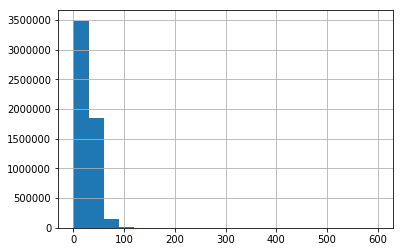

In [52]:
morning.value.hist(bins = 20)

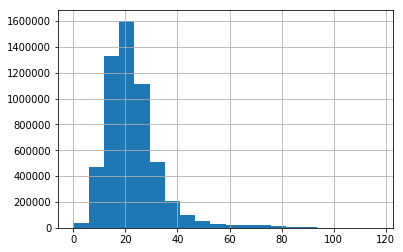

In [53]:
evening.value.hist(bins = 20)

# train, test split

In [81]:
from sklearn.model_selection import train_test_split

## morning

In [82]:
y = morning.value
X = morning.drop('value', axis = 1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 333 )

In [86]:
X_train['y'] = y_train
X_test['y'] = y_test

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
print('train shape : ', X_train.shape)
print('test shape : ', X_test.shape)

train shape :  (3852689, 39)
test shape :  (1651153, 39)


In [92]:
X_train.columns = ['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'special', 'vacation', 'time', 'temperature', 'wind',
       'rain', 'snow', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'inter_num', 'd1', 'd2',
       'd3', 'd4', 'd_sum', 'severity', 'accident_count', 'y']
X_test.columns = X_train.columns

In [94]:
X_train.to_csv('../data/final/morning_train.csv', index = False, encoding = 'utf-8')
X_test.to_csv('../data/final/morning_test.csv', index = False, encoding = 'utf-8')

## evening

In [95]:
y = evening.value
X = evening.drop('value', axis = 1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 333 )

In [97]:
X_train['y'] = y_train
X_test['y'] = y_test

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
print('train shape : ', X_train.shape)
print('test shape : ', X_test.shape)

train shape :  (3863426, 39)
test shape :  (1655755, 39)


In [99]:
X_train.columns = ['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'special', 'vacation', 'time', 'temperature', 'wind',
       'rain', 'snow', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'inter_num', 'd1', 'd2',
       'd3', 'd4', 'd_sum', 'severity', 'accident_count', 'y']
X_test.columns = X_train.columns

In [101]:
X_train.to_csv('../data/final/evening_train.csv', index = False, encoding = 'utf-8')
X_test.to_csv('../data/final/evening_test.csv', index = False, encoding = 'utf-8')